# **Exploratory data analysis on Terrorism Dataset- Task 3**
The aim of this task to perform Exploratory data analysis on terrorism dataset.
Exploratory data analysis(EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.The dataset is about the terrorism and its related information from 1970 to 2017.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('terrorism.csv' , encoding="ISO-8859-1")

<ipython-input-15-6aa431592b56>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('terrorism.csv' , encoding="ISO-8859-1")


In [16]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## **Let's Select attributes which we want to analyze**

In [17]:
df = df[['eventid','iyear','imonth','iday','country_txt','region_txt','attacktype1_txt','targtype1_txt',
        'gname','weaptype1_txt','dbsource']]

In [18]:
df.shape

(181691, 11)

In [20]:
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Private Citizens & Property,MANO-D,Unknown,PGIS
1,197000000002,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,PGIS
2,197001000001,1970,1,0,Philippines,Southeast Asia,Assassination,Journalists & Media,Unknown,Unknown,PGIS
3,197001000002,1970,1,0,Greece,Western Europe,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,PGIS
4,197001000003,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,PGIS


In [21]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
attacktype1_txt    0
targtype1_txt      0
gname              0
weaptype1_txt      0
dbsource           0
dtype: int64

In [23]:
df.describe()

,eventid,iyear,imonth,iday
count,1.816910e+05,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644
std,1.325957e+09,13.259430,3.388303,8.814045
min,1.970000e+11,1970.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000
max,2.017123e+11,2017.000000,12.000000,31.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          181691 non-null  int64 
 1   iyear            181691 non-null  int64 
 2   imonth           181691 non-null  int64 
 3   iday             181691 non-null  int64 
 4   country_txt      181691 non-null  object
 5   region_txt       181691 non-null  object
 6   attacktype1_txt  181691 non-null  object
 7   targtype1_txt    181691 non-null  object
 8   gname            181691 non-null  object
 9   weaptype1_txt    181691 non-null  object
 10  dbsource         181691 non-null  object
dtypes: int64(4), object(7)
memory usage: 15.2+ MB


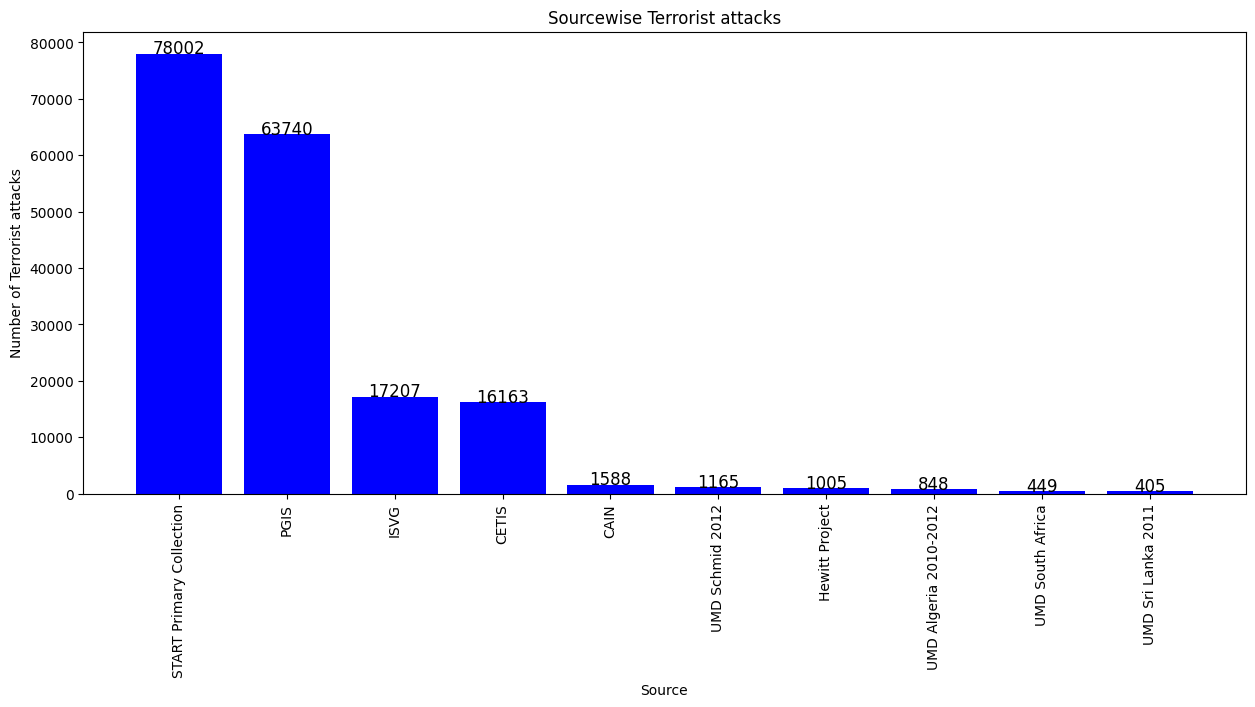

In [27]:
plt.figure(figsize=(15,6))
plt.bar(df.dbsource.value_counts()[:10].index,df.dbsource.value_counts()[:10].values,color='blue')
# setting the axis labels and title
plt.xlabel('Source')
plt.ylabel('Number of Terrorist attacks')
plt.title('Sourcewise Terrorist attacks')
plt.xticks(rotation=90)
# # rotating the x-axis labels for better visibility
for i, v in enumerate(df.dbsource.value_counts()[:10].values):
    plt.text(df.dbsource.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')

plt.show()

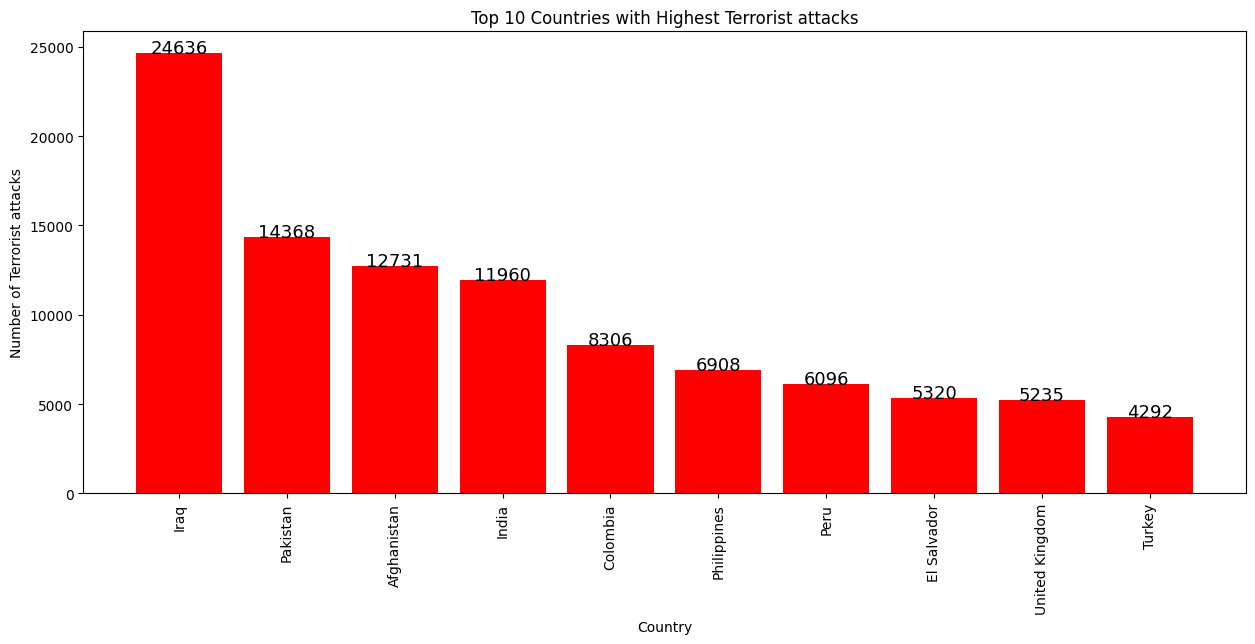

In [28]:
plt.figure(figsize=(15,6))
plt.bar(df.country_txt.value_counts()[:10].index,df.country_txt.value_counts()[:10].values,color='red')
plt.xlabel('Country')
plt.ylabel('Number of Terrorist attacks')
plt.title('Top 10 Countries with Highest Terrorist attacks')
plt.xticks(rotation=90)
for i, v in enumerate(df.country_txt.value_counts()[:10].values):
    plt.text(df.country_txt.value_counts()[:10].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')

plt.show()

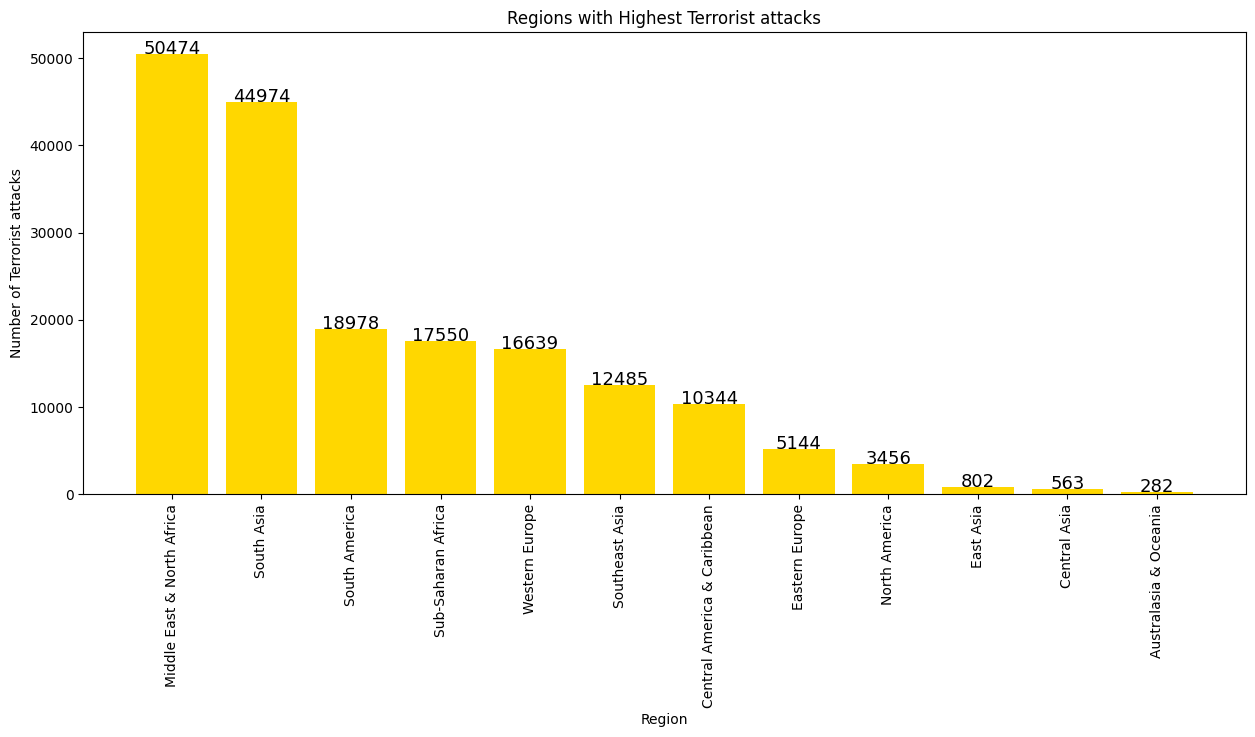

In [58]:
plt.figure(figsize=(15,6))
plt.bar(df.region_txt.value_counts().index,df.region_txt.value_counts().values,color='gold')

plt.xlabel('Region')
plt.ylabel('Number of Terrorist attacks')
plt.title('Regions with Highest Terrorist attacks')

plt.xticks(rotation=90)
for i, v in enumerate(df.region_txt.value_counts().values):
    plt.text(df.region_txt.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')

plt.show()

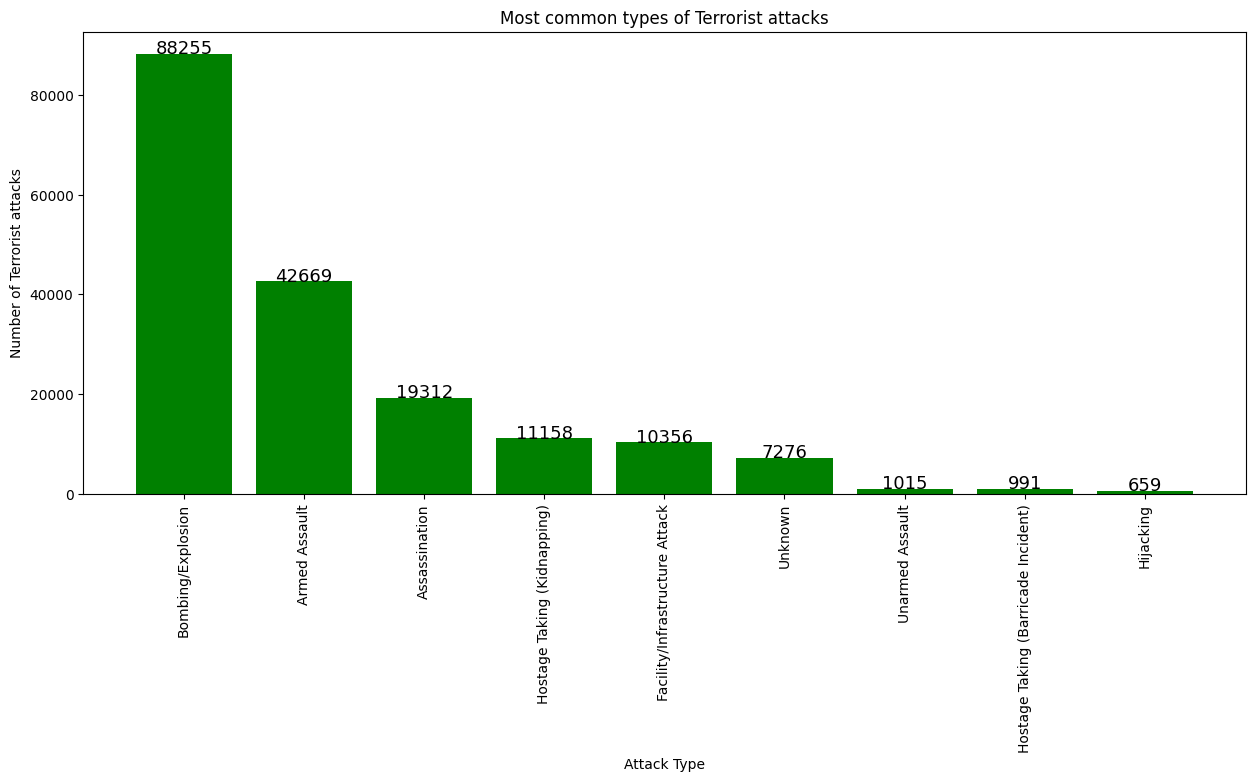

In [30]:
plt.figure(figsize=(15,6))
plt.bar(df.attacktype1_txt.value_counts().index,df.attacktype1_txt.value_counts().values,color='green')

plt.xlabel('Attack Type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most common types of Terrorist attacks')

plt.xticks(rotation=90)
for i, v in enumerate(df.attacktype1_txt.value_counts().values):
    plt.text(df.attacktype1_txt.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')

plt.show()

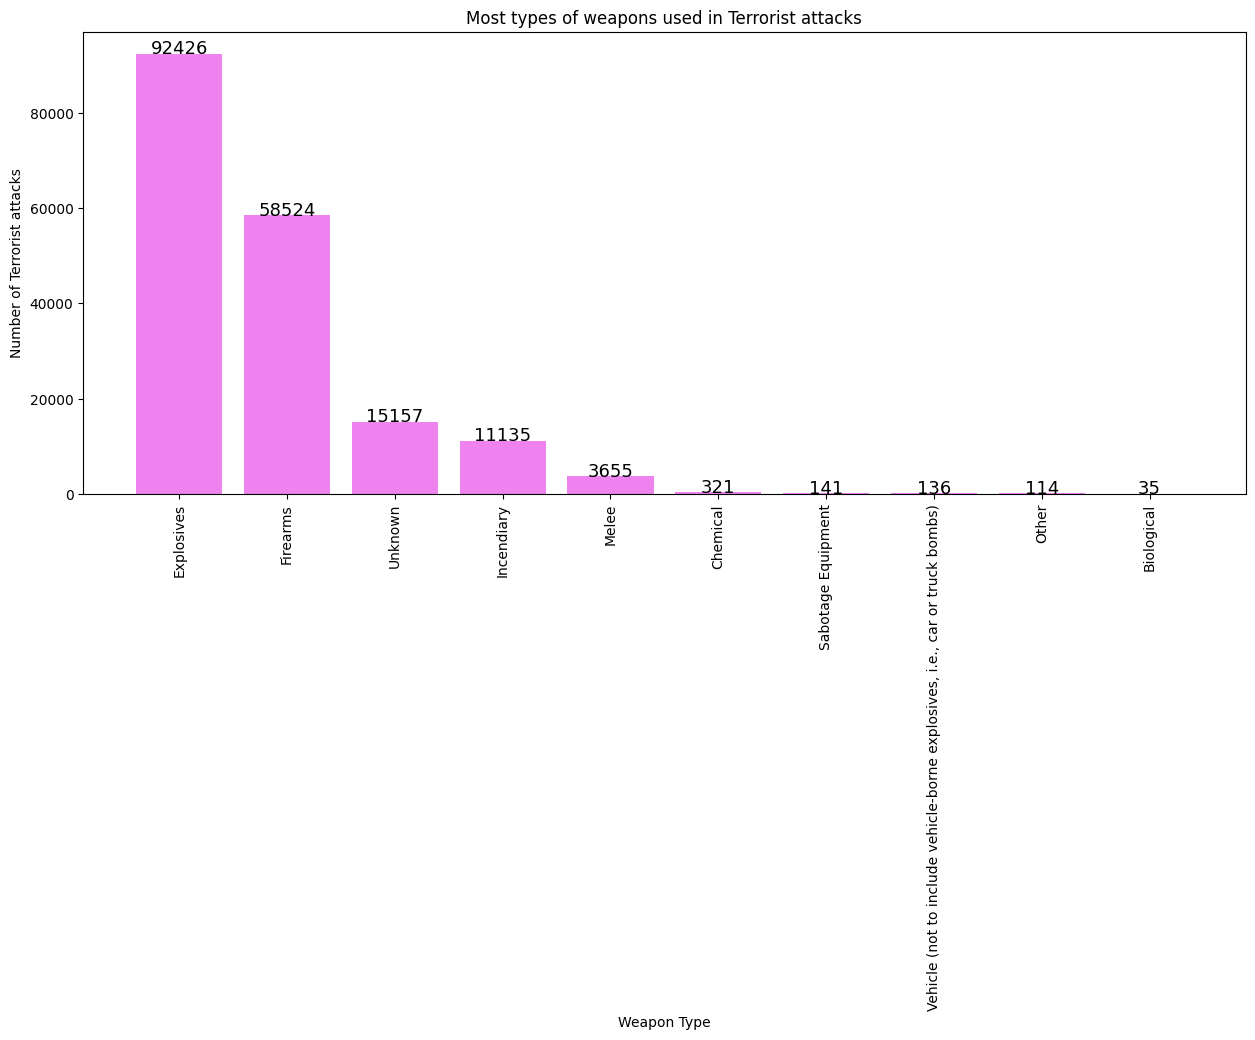

In [31]:
plt.figure(figsize=(15,6))
plt.bar(df.weaptype1_txt.value_counts()[:10].index,df.weaptype1_txt.value_counts()[:10].values,color='violet')

plt.xlabel('Weapon Type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most types of weapons used in Terrorist attacks')

plt.xticks(rotation=90)
for i, v in enumerate(df.weaptype1_txt.value_counts()[:10].values):
    plt.text(df.weaptype1_txt.value_counts()[:10].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')

plt.show()

In [33]:
highest_values = df.groupby(['iyear'])['eventid'].count()
highest_values

iyear
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: eventid, dtype: int64

Text(0.5, 1.0, 'Terrorist attacks occur each year')

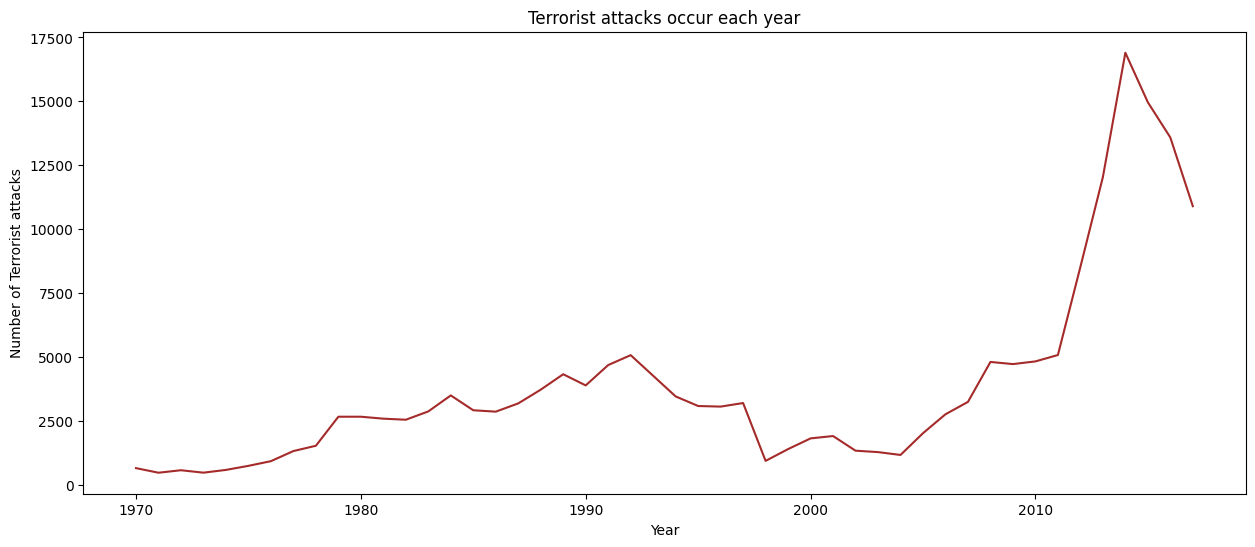

In [59]:
plt.figure(figsize=(15,6))

plt.plot(highest_values.index, highest_values.values, color="brown")
plt.xlabel('Year')
plt.ylabel('Number of Terrorist attacks')
plt.title('Terrorist attacks occur each year')




## **Comparing terrorist attacks before and after 2011**


In [39]:
new_row = pd.DataFrame(data = {
    'year' : ['Before 2011','After 2011'],
    'value' : [df[df.iyear < 2011].shape[0],df[df.iyear >= 2011].shape[0]]
})
new_row = new_row.set_index('year')
new_row

,value
year,
Before 2011,99702
After 2011,81989


<Axes: ylabel='value'>

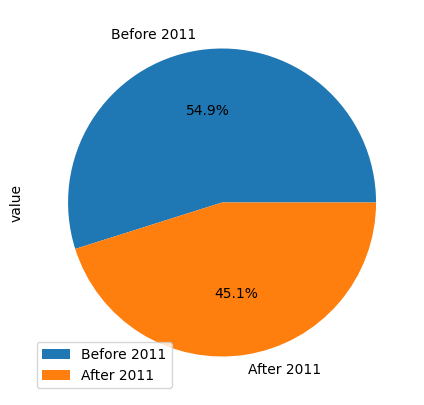

In [41]:
new_row.plot.pie(y='value', figsize=(5, 5),legend = 'country', autopct='%1.1f%%')

In [52]:
df_india = df[df.country_txt == 'India']
df_india.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
1186,197202220004,1972,2,22,India,South Asia,Hijacking,Airports & Aircraft,Palestinians,Explosives,Hijacking DB
2764,197501190004,1975,1,2,India,South Asia,Bombing/Explosion,Government (General),Ananda Marga,Explosives,UMD Encyclopedia of World Terrorism 2012
3857,197605260001,1976,5,26,India,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,PGIS
5327,197709280004,1977,9,28,India,South Asia,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Firearms,Hijacking DB
7337,197901130004,1979,1,13,India,South Asia,Armed Assault,Police,Naga People,Firearms,PGIS


In [53]:
df_pakistan = df[df.country_txt == 'Pakistan']
df_pakistan.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
585,197011010001,1970,11,1,Pakistan,South Asia,Assassination,Government (Diplomatic),Unknown,Vehicle (not to include vehicle-borne explosiv...,PGIS
2217,197402020001,1974,2,2,Pakistan,South Asia,Bombing/Explosion,Maritime,Muslim Guerrillas,Firearms,PGIS
2705,197412090001,1974,12,9,Pakistan,South Asia,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,PGIS
2744,197500000001,1975,0,0,Pakistan,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,PGIS
2795,197502080001,1975,2,8,Pakistan,South Asia,Assassination,Government (General),National Awami Party,Firearms,PGIS


In [54]:
new_row = pd.DataFrame(data = {
    'country' : ['India','Pakistan','Other Countries'],
    'value' : [df_india.shape[0],df_pakistan.shape[0],df[(df.region_txt == 'South Asia') & (df.country_txt != 'India') & (df.country_txt != 'Pakistan')].shape[0]]
})
new_row = new_row.set_index('country')
new_row

,value
country,
India,11960
Pakistan,14368
Other Countries,18646


<Axes: ylabel='value'>

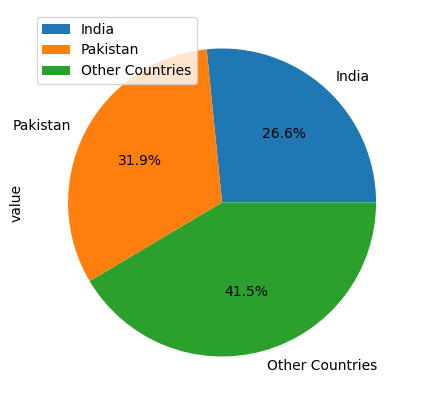

In [55]:
new_row.plot.pie(y='value', figsize=(5, 5),legend = 'country', autopct='%1.1f%%')

In [56]:
india_year_wise_values = df_india.groupby(['iyear'])['eventid'].count()
india_year_wise_values
pakistan_year_wise_values = df_pakistan.groupby(['iyear'])['eventid'].count()
pakistan_year_wise_values
df_india_pakistan = pd.DataFrame({'India': india_year_wise_values, 'Pakistan': pakistan_year_wise_values})
df_india_pakistan.head()

,India,Pakistan
iyear,,
1970,NaN,1.0
1972,1.0,NaN
1974,NaN,2.0
1975,1.0,2.0
1976,1.0,3.0


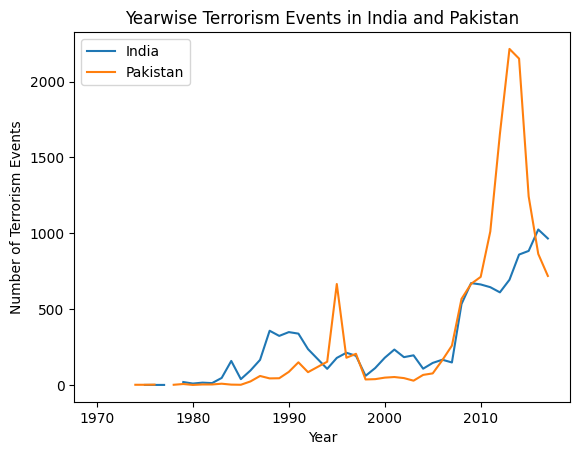

In [57]:
df_india_pakistan.plot()
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in India and Pakistan')
plt.legend()
plt.show()